# Neural Network for Regression with Tensorflow

In this notebook, I am going to build multiple neural network models to solve a regression problem. Before I start working on the model, I would like to give a brief overview of what I will touch on and what steps I will follow. I will build a neural network model and then improve it in order to achieve better predictions, also see this development visually in the graphs.
As I mentioned above, I am going to solve a regression problem by building a neural network model. There are multiple definitions for a regression problem, but in my case, I'm going to simplify it, I'm going to predict a number.

Let’s start from the very beginning.






## What I am going to cover
* What is Regression?
* What is a Neural Network?
* Architecture of a neural network regression model
* Input shapes and output shapes of aregression model(features and labels)
* Creating custom data to view and fit
* Steps in modelling
* Creating a model, compiling a model, fitting a model, evaluatin a model
* Different evaluation methods
* Saving and loading models

# What is Regression?
For example, if the model that we built should predict discrete or continuous values like a person’s age, earnings, years of experience, or need to find out that how these values are correlated with the person, it shows that we are facing a regression problem.

To learn more on regression I used the link

https://www.javatpoint.com/regression-analysis-in-machine-learning

# What is  Neural Network?
Just like a human brain, a neural network is a series of algorithms that detect basic patterns in a set of data. The neural network works as a neural network in the human brain. A “neuron” in a neural network is a mathematical function that searches for and classifies patterns according to a specific architecture.

It is possible and important to talk about each of these topics in detail and for a long time, but my goal in this notebook is to build a model and work on it after briefly touching on the important points.

# Architecture of a Neural Network
The architecture of neural networks is made up of an input, output, and hidden layer. Neural networks themselves, or artificial neural networks (ANNs), are a subset of machine learning designed to mimic the processing power of a human brain. Neural networks function by passing data through the layers of an artificial neuron.

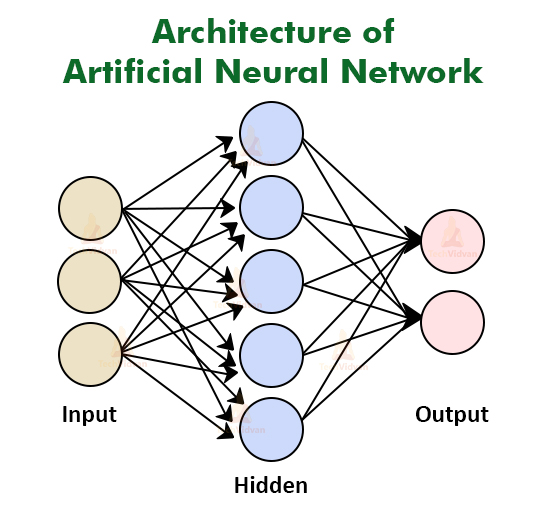

For more information on neural networks:

Oreily: https://www.oreilly.com/library/view/deep-learning/9781491924570/ch04.html

Neural network architecture: https://h2o.ai/wiki/neural-network-architectures/#:~:text=The%20architecture%20of%20neural%20networks,power%20of%20a%20human%20brain.



# Creating some data to view and fit

In [131]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


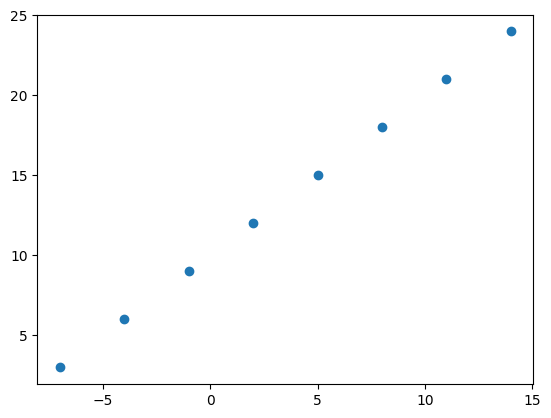

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);


In [133]:

y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output shapes

In [134]:

# Creating a demo for a housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [135]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [136]:
X[0], y[0]

(-7.0, 3.0)

In [137]:
X[1], y[1]

(-4.0, 6.0)

In [138]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [139]:
X[0].ndim
# The reason why it has no shape

0

One important point in NN is the input shapes and the output shapes. The input shape is the shape of the data that we train the model on, and the output shape is the shape of data that we expect to come out of our model. Here we will use X and aim to predict y, so, X is our input and y is our output.

X.shape, y.shape

In [140]:
X.shape, y.shape

((8,), (8,))

Here we can see that our tensors have the same shape, but in real life, it may not be that way always, so, we should check and fix that if needed before we build a model. Let’s start building our model with TensorFlow. There are 3 typical steps to creating a model in TensorFlow:

In [141]:

# Turn our numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# Steps in Modeling with TensorFlow

1. **Creating a model** – connect the layers of the neural network yourself, here we either use Sequential or Functional API, also we may import a previously built model that we call transfer learning. Define the input and output layers, as well as the hidden layers of deep learning model.
2. **Compiling a model** – at this step, we define how to measure a model’s performance, which optimizer should be used. Define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning and evaluation
3. **Fitting a model** – In this step, we introduce the model to the data and let it find patterns; Letting the model try to find patterns between X & y (features and labels)

In [142]:
# first set random seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #stochastic GD
              metrics = ['mae'])

# 3. Fit the model
model.fit( X, y, epochs = 10)

Epoch 1/10


ValueError: ignored

### **There is a problem in the above code**
I just realized that using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, I'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).

In my case, this means instead of using model.fit(X, y, epochs=5), use model.fit(tf.expand_dims(X, axis=-1), y, epochs=5.

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])
model.compile( loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 5)

In [ ]:
# Another way of doing it
X = np.expand_dims(X, axis=-1)
y = np.expand_dims(y, axis=-1)

tf.random.set_seed(42)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])
model.compile( loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])
model.fit(X, y, epochs = 10)


 Keep tabs on the reassingment of the X and y Values above.  By using np.expand_dims on them, each now has an extra axis added to its dimension. I shall squeeze them later in this notebook when recalling them.

In [143]:
# Making  predictions
model.predict([17])

ValueError: ignored


It doesn't predict well. It performs drastically. Needs a lot of improvements

## Improving the model

The model can be improved by altering the steps taken to create it.

1. **Creating a model** - Here, we add more layers, increase the number of hidden units (all called nuerons) within each of the hidden layers, change the activation fucntion of each layer.
2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training fo longer) or on more data(given teh model more examples to learn from)

In [144]:
# Recall the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [145]:
# Squeeze the single dimensions
X = tf.squeeze(X, axis=-1)
y = tf.squeeze(y, axis=-1)

InvalidArgumentError: ignored

In [ ]:
# Recall the data
X, y

In [ ]:
# Rebuilding the model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics = ['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs= 100)

In [ ]:
# Try to predict
model.predict([17])

# Common ways to improve a model
1. Adding layers
2. Icreasing the number of hidden units
3. Change the activation functions
4. Change the optimization function
5. Change the learing rate. (Default - lr = 0.0001)
6. Fitting on more data
7. Fitting for longer(epochs)

# Evaluating a model
For regression problems, we have 2 evaluation metrics, MAE(mean absolute error)  and MSE(mean squared error)

**Mean Absolute Error(MAE)**

MAE is a very simple metric which calculates the absolute difference between actual and predicted values.

To better understand, let’s take an example you have input data and output data and use Linear Regression, which draws a best-fit line.

Now you have to find the MAE of your model which is basically a mistake made by the model known as an error. Now find the difference between the actual value and predicted value that is an absolute error but we have to find the mean absolute of the complete dataset.

so, sum all the errors and divide them by a total number of observations And this is MAE. And we aim to get a minimum MAE because this is a loss.

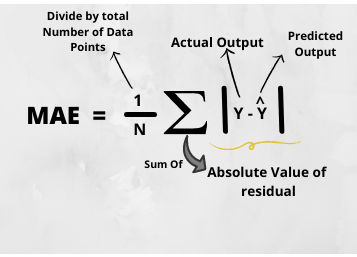

*Advantages of MAE*

* The MAE you get is in the same unit as the output variable.
* It is most Robust to outliers.

*Disadvantages of MAE*

* The graph of MAE is not differentiable so we have to apply various optimizers like Gradient descent which can be differentiable.




**Mean Squared Error(MSE)**

MSE is a most used and very simple metric with a little bit of change in mean absolute error. Mean squared error states that finding the squared difference between actual and predicted value.

So, above we are finding the absolute difference and here we are finding the squared difference.

What actually the MSE represents? It represents the squared distance between actual and predicted values. we perform squared to avoid the cancellation of negative terms and it is the benefit of MSE.


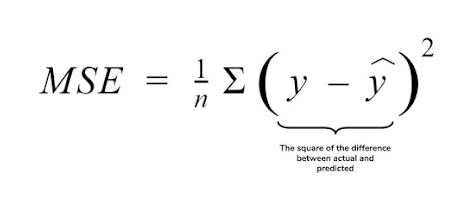

*Advantages of MSE*

* The graph of MSE is differentiable, so you can easily use it as a loss function.

*Disadvantages of MSE*

* The value you get after calculating MSE is a squared unit of output. for example, the output variable is in meter(m) then after calculating MSE the output we get is in meter squared.
* If you have outliers in the dataset then it penalizes the outliers most and the calculated MSE is bigger. So, in short, It is not Robust to outliers which were an advantage in MAE.

## Visualizations
When it comes to visualization, it is a good idea to visualize
* The data - what data are we working with? What does it look like?
* The model itself - What does our model look like?
* The training of a model - how does a model perform while it learns
* The predictions of the model - how do the predictions of a line up against the ground truth(the original labels)

In [146]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [147]:

# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

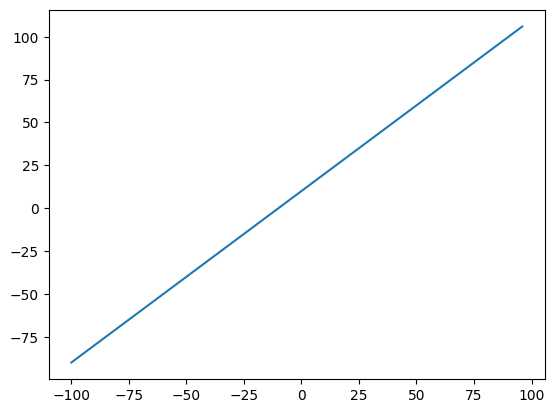

In [148]:
# Visualize the data
import matplotlib.pyplot as plt
plt.plot(X, y);

### The 3 sets....
**Training set** - the model learns from this data , which is typically 70-80% of the total data you have available.

**Validataion set** - the model gets tuned on this data, which is typically 10-15% of the available data.

**Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available

In [149]:
# Check the length of how many samples we have
len(X)

50

In [150]:
# Split the data inot train and test sets
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_test)


(40, 10)

### Visualize the data
Now we've  got our data in training and test sets, let's visualize.

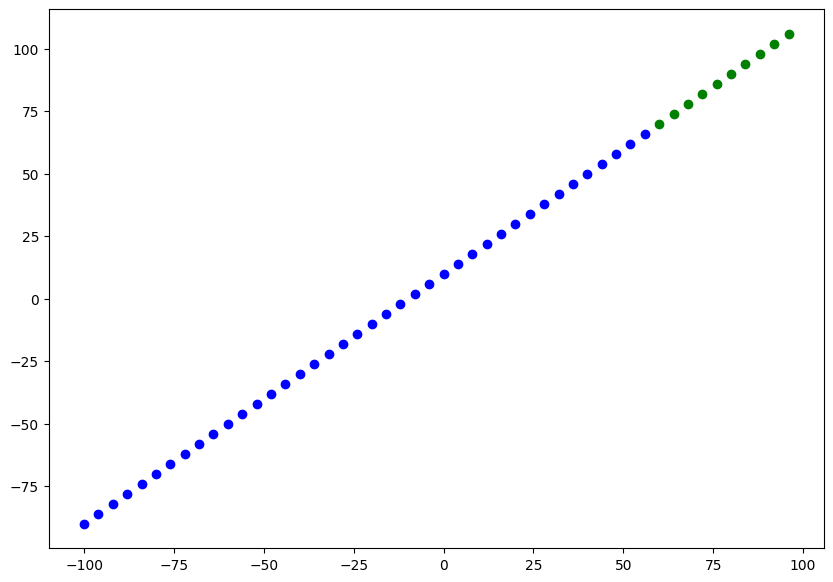

In [151]:

plt.figure(figsize=(10,7))
# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

In [152]:

# Let's have  a look at how to build a nearal network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

In [153]:



model.summary()

ValueError: ignored

In [154]:
# A model that builds automatically by defining the input_shape argument in first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1, input_shape=[1])
)

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])



In [155]:

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params = total number of parameters in the model
* Trainable params = these are the parameters(patterm) the model can update as it trains
* Non-trainable params = these parameters aren't updated during training(this is typical when you bring in already learned patterns from other models during **transfer learning**)

For more in dept overveiw

http://introtodeeplearning.com/

https://h2o.ai/wiki/weights-and-biases/#:~:text=Weights%20set%20the%20standards%20for,information%20to%20efficiently%20propagate%20forward.

https://www.baeldung.com/cs/non-trainable-parameter#:~:text=As%20already%20mentioned%2C%20parameters%20usually,updated%20during%20the%20training%20phase.]

Best resource to learn from

https://www.analyticsvidhya.com/blog/2022/10/multi-layer-perceptrons-notations-and-trainable-parameters/

In [156]:

# Get a summary of our model
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


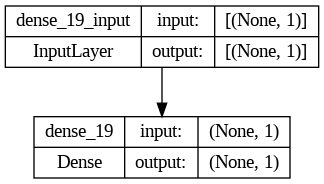

In [157]:





from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

# Visualizing our model's prediction

To visualize predictions, its a good idea to plot them agaisnt the ground truth labels.
The form of `y_test` or `y_true` verus `y_pred`

In [158]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 57ms/step


array([[-2.2449088],
       [-2.3945694],
       [-2.54423  ],
       [-2.6938906],
       [-2.8435512],
       [-2.9932117],
       [-3.1428723],
       [-3.292533 ],
       [-3.4421935],
       [-3.591854 ]], dtype=float32)

# Observe the difference when the input layers are changed.

For better understanding. Read the thoroughly the following article

https://www.analyticsvidhya.com/blog/2022/10/multi-layer-perceptrons-notations-and-trainable-parameters/


In [159]:
# When dense is increased from 1 to 10
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential(
    tf.keras.layers.Dense(10, input_shape=[1]) # Dense = 10
)

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])


In [160]:

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [161]:
y_true = model.predict(X_test)
y_true

1/1 [==============================] - 0s 53ms/step


array([[ 32.09049  ,   8.597778 ,   1.7163098,  33.339054 , -41.425365 ,
        -32.387196 ,  -3.7184572, -33.63743  , -38.582405 ,  27.80193  ],
       [ 34.229855 ,   9.170963 ,   1.8307304,  35.561657 , -44.187057 ,
        -34.54634  ,  -3.9663544, -35.879925 , -41.154564 ,  29.655392 ],
       [ 36.36922  ,   9.744148 ,   1.9451511,  37.78426  , -46.94875  ,
        -36.705486 ,  -4.2142515, -38.12242  , -43.726723 ,  31.508854 ],
       [ 38.508587 ,  10.317333 ,   2.0595717,  40.006863 , -49.71044  ,
        -38.86463  ,  -4.4621487, -40.364914 , -46.298885 ,  33.362316 ],
       [ 40.647953 ,  10.890519 ,   2.1739924,  42.22947  , -52.47213  ,
        -41.02378  ,  -4.710046 , -42.60741  , -48.871044 ,  35.21578  ],
       [ 42.78732  ,  11.463704 ,   2.288413 ,  44.452072 , -55.23382  ,
        -43.182926 ,  -4.957943 , -44.849907 , -51.443207 ,  37.06924  ],
       [ 44.926685 ,  12.036889 ,   2.4028337,  46.674675 , -57.995514 ,
        -45.34207  ,  -5.20584  , -47.0924   

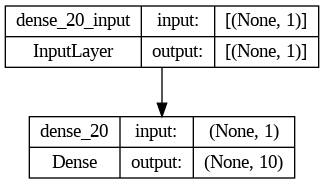

In [162]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

In [163]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 17.0290 - mae: 17.0290
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 12.2341 - mae: 12.2341
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.5235 - mae: 11.5235
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4286 - mae: 9.4286
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.3168 - mae: 10.3168
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.5616 - mae: 9.5616
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.6802 - mae: 8.6802
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0540 - mae: 9.0540
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 19.0256 - mae: 19.0256
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2670 - mae: 10.2670
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - 

In [164]:
# Making predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 51ms/step


array([[42.875526],
       [45.64644 ],
       [48.41735 ],
       [51.18826 ],
       [53.959167],
       [56.73008 ],
       [59.50099 ],
       [62.2719  ],
       [65.04281 ],
       [67.81372 ]], dtype=float32)

In [165]:
# Creating a plotting function
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):


  """
  Plots training data, test data and compares preditions to ground truth labels.
  """

  plt.figure(figsize=(10,7))
  # Plot the training  data in blue
  plt.scatter(train_data, train_label, c="b", label="Training data")
  # Plot the testing data in green
  plt.scatter(test_data, test_labels, c='g', label="Test data")
  # Plot models prediction in red
  plt.scatter(test_data, predictions, c="r", label="predictions")
  # Show the legend
  plt.legend();


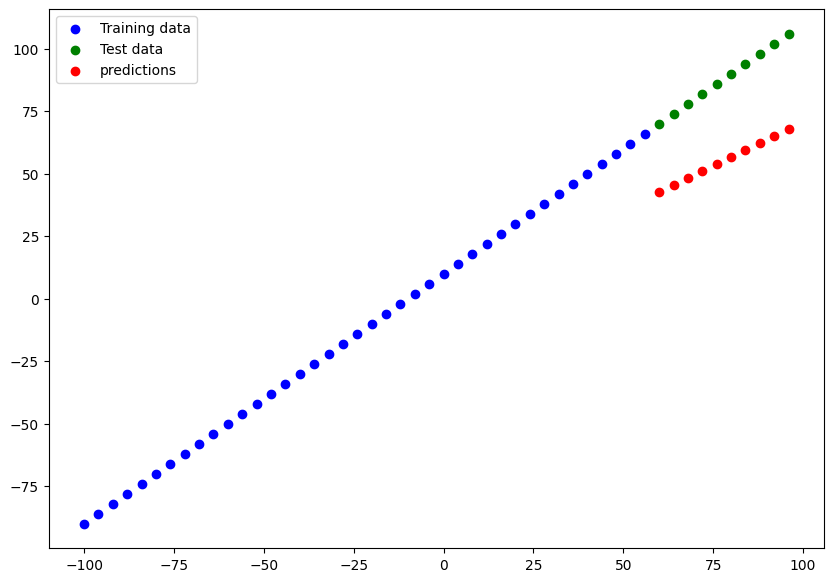

In [166]:


plot_predictions()


## Evaluation Metrics

In [167]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 112ms/step - loss: 32.6554 - mae: 32.6554


[32.65537643432617, 32.65537643432617]

The above output gives similar results since I set the losses to mae and metrics also to mae

In [168]:
# Calculate the mean absolute error
mae = tf.keras.metrics.mean_absolute_error(y_true= y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([45.124474, 42.35356 , 39.58265 , 36.81174 , 34.040833, 31.269922,
       28.499008, 25.7281  , 22.957191, 20.18628 ], dtype=float32)>

In [169]:
y_pred - y_test

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[-28, -32, -36, -40, -44, -48, -52, -56, -60, -64],
       [-25, -29, -33, -37, -41, -45, -49, -53, -57, -61],
       [-22, -26, -30, -34, -38, -42, -46, -50, -54, -58],
       [-19, -23, -27, -31, -35, -39, -43, -47, -51, -55],
       [-17, -21, -25, -29, -33, -37, -41, -45, -49, -53],
       [-14, -18, -22, -26, -30, -34, -38, -42, -46, -50],
       [-11, -15, -19, -23, -27, -31, -35, -39, -43, -47],
       [ -8, -12, -16, -20, -24, -28, -32, -36, -40, -44],
       [ -5,  -9, -13, -17, -21, -25, -29, -33, -37, -41],
       [ -3,  -7, -11, -15, -19, -23, -27, -31, -35, -39]], dtype=int32)>

In [170]:
# NOt getting the result I want so I'll convert y_preds into tensors
y_pred  = tf.constant(y_pred)
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[42.875526],
       [45.64644 ],
       [48.41735 ],
       [51.18826 ],
       [53.959167],
       [56.73008 ],
       [59.50099 ],
       [62.2719  ],
       [65.04281 ],
       [67.81372 ]], dtype=float32)>

In [171]:
y_test - y_pred

InvalidArgumentError: ignored

In [172]:
# Still not working, call the values and check whether the shapes match

In [173]:
y_test, y_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[42.875526],
        [45.64644 ],
        [48.41735 ],
        [51.18826 ],
        [53.959167],
        [56.73008 ],
        [59.50099 ],
        [62.2719  ],
        [65.04281 ],
        [67.81372 ]], dtype=float32)>)

In [174]:
# Use tf.squeeze to get rid of the single dimension in the tensor
y_pred = tf.squeeze(y_pred, axis=-1)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([42.875526, 45.64644 , 48.41735 , 51.18826 , 53.959167, 56.73008 ,
       59.50099 , 62.2719  , 65.04281 , 67.81372 ], dtype=float32)>

In [176]:
y_test, y_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([42.875526, 45.64644 , 48.41735 , 51.18826 , 53.959167, 56.73008 ,
        59.50099 , 62.2719  , 65.04281 , 67.81372 ], dtype=float32)>)

In [177]:
tf.cast(y_test, dtype=tf.float32) - y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([27.124474, 28.353561, 29.58265 , 30.81174 , 32.040833, 33.26992 ,
       34.49901 , 35.7281  , 36.95719 , 38.18628 ], dtype=float32)>

In [178]:
# Calculate the mean absolute error
mae = tf.keras.metrics.mean_absolute_error(y_true= y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=32.655376>

In [179]:
# Calculate the mean squared error
mse = tf.keras.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1078.8365>

In [181]:
# Trying out the huber evaluation metric
y_true = y_test
y_pred = tf.squeeze(y_pred)
huber = tf.keras.losses.Huber()
huber(y_true, y_pred).numpy()

32.155373

In [189]:
# Make functions to reuse mae and mse
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

# Running experiments to improve the model


1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of layers or more hidden units in each leyer.
3. Train for longer - give your model more of chance to find patterns in data

### 3 Modelling experiments
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. 'model_3` - 2 layers, trained for 500 epochs


**Build model_1**

In [184]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 41ms/step - loss: 23.9920 - mae: 23.9920
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 10.4470 - mae: 10.4470
Epoch 3/100
2/2 [==============================] - 0s 21ms/step - loss: 16.8969 - mae: 16.8969
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 9.1416 - mae: 9.1416
Epoch 5/100
2/2 [==============================] - 0s 19ms/step - loss: 10.9983 - mae: 10.9983
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 10.1615 - mae: 10.1615
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 9.1820 - mae: 9.1820
Epoch 8/100
2/2 [==============================] - 0s 15ms/step - loss: 9.1254 - mae: 9.1254
Epoch 9/100
2/2 [==============================] - 0s 22ms/step - loss: 15.2230 - mae: 15.2230
Epoch 10/100
2/2 [==============================] - 0s 18ms/step - loss: 7.8316 - mae: 7.8316
Epoch 11/100
2/2 [==============================] - 0s 20m

1/1 [==============================] - 0s 49ms/step


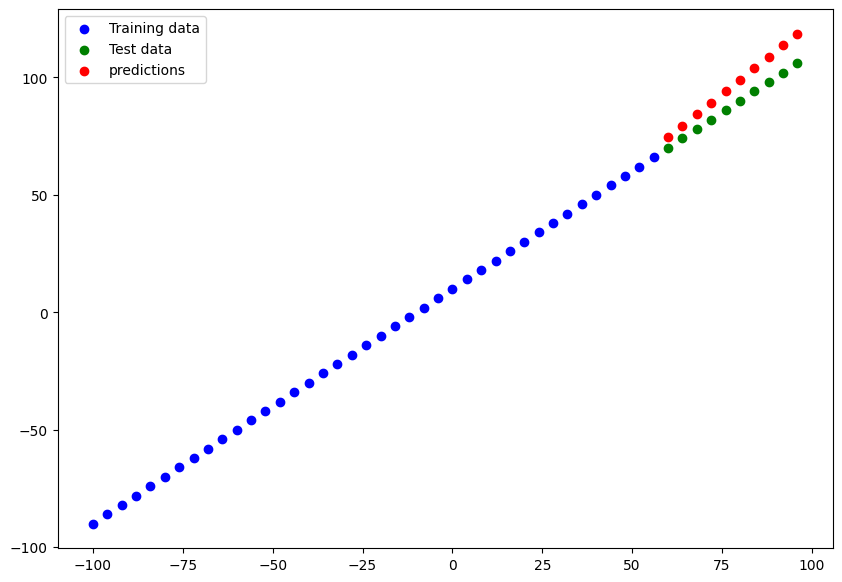

In [185]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [190]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.534085>,
 <tf.Tensor: shape=(), dtype=float32, numpy=79.27797>)

**Build model_2**
* 2 dense layers, trained for 100 epochs

In [210]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=['mse'])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 18ms/step - loss: 66.7062 - mse: 6533.4521
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 11.4795 - mse: 162.8085
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 29.2920 - mse: 1283.0413
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 13.8617 - mse: 246.8669
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 15.3102 - mse: 300.1263
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 12.1501 - mse: 182.3924
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.4367 - mse: 158.6676
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1737 - mse: 172.6848
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 41.4916 - mse: 2739.0549
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 28.7533 - mse: 1167.8347
Epoch 11/100
2/2 [=======================

1/1 [==============================] - 0s 59ms/step


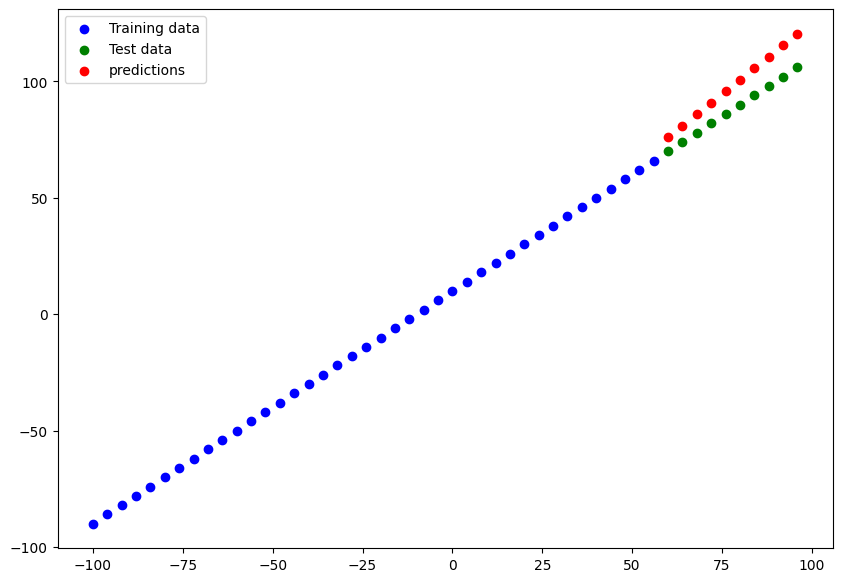

In [211]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [212]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2


(<tf.Tensor: shape=(), dtype=float32, numpy=10.199164>,
 <tf.Tensor: shape=(), dtype=float32, numpy=111.41183>)

**Build model_3**
* 2 layers trained for 500 epochs

In [214]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 35ms/step - loss: 34.4326 - mae: 34.4326
Epoch 2/500
2/2 [==============================] - 0s 14ms/step - loss: 21.5465 - mae: 21.5465
Epoch 3/500
2/2 [==============================] - 0s 13ms/step - loss: 27.4224 - mae: 27.4224
Epoch 4/500
2/2 [==============================] - 0s 12ms/step - loss: 19.5757 - mae: 19.5757
Epoch 5/500
2/2 [==============================] - 0s 12ms/step - loss: 13.2263 - mae: 13.2263
Epoch 6/500
2/2 [==============================] - 0s 13ms/step - loss: 10.6858 - mae: 10.6858
Epoch 7/500
2/2 [==============================] - 0s 16ms/step - loss: 11.6457 - mae: 11.6457
Epoch 8/500
2/2 [==============================] - 0s 13ms/step - loss: 10.7400 - mae: 10.7400
Epoch 9/500
2/2 [==============================] - 0s 13ms/step - loss: 36.1897 - mae: 36.1897
Epoch 10/500
2/2 [==============================] - 0s 16ms/step - loss: 24.0635 - mae: 24.0635
Epoch 11/500
2/2 [==============================]

1/1 [==============================] - 0s 127ms/step


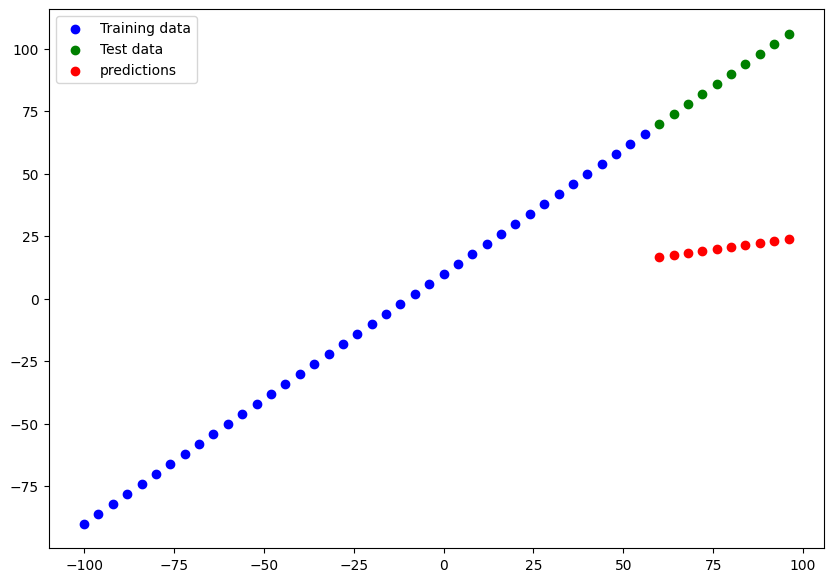

In [215]:
# Make and plot predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

The model has learned for too long. It suffers from overfitting

**What is overfitting?**

It is a common pitfall in deep learning algorithms in which a model tries to fit the training data entirely and ends up memorizing the data patterns and the noise and random fluctuations.

These models fail to generalize and perform well in the case of unseen data scenarios, defeating the model's purpose.


### To learn more about overfitting and underfitting use this online resource

https://www.v7labs.com/blog/overfitting#:~:text=Simplify%20data&text=The%20data%20simplification%20method%20is,dropout%20on%20a%20neutral%20network.

In [217]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.75301>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4674.714>)

**Note** The process of creating a nerual model in brief

* Start with small models and make sure they work. Increase the scale when necessary

# Comparing the results of  the experiments

In [229]:
import pandas as pd
model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,8.534085,79.277969
1,model_2,10.199164,111.411827
2,model_3,67.753014,4674.713867


In [228]:
model_2.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 10)                20        
                                                                 
 dense_49 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# Tracking the experiments

**TensorBoard** -  A component of the TensorFlow library to help track modeling experiments.

**Weights & Biases** - A tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving our models
There are two ways to save models:
1. SavedModel Format
2. HDF5 Format

In [231]:
# Save a model using the savedmodel format
model_2.save("best_model_savemodel_format")

In [232]:
# Save a model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a a saved model

In [236]:
# Load in the savedmodel formt
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_savemodel_format")
loaded_SavedModel_format.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 10)                20        
                                                                 
 dense_49 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [237]:
# Comparing if the two are the same
loaded_SavedModel_format.summary() == model_2.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 10)                20        
                                                                 
 dense_49 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 10)                20        
                                                                 
 dense_49 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params:

True

The above process is the same one used to load HDF5 formats